In [4]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
M=nx.read_gml("polblogs.gml", relabel=True)

In [6]:
 
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

Creating graph of the political blog network

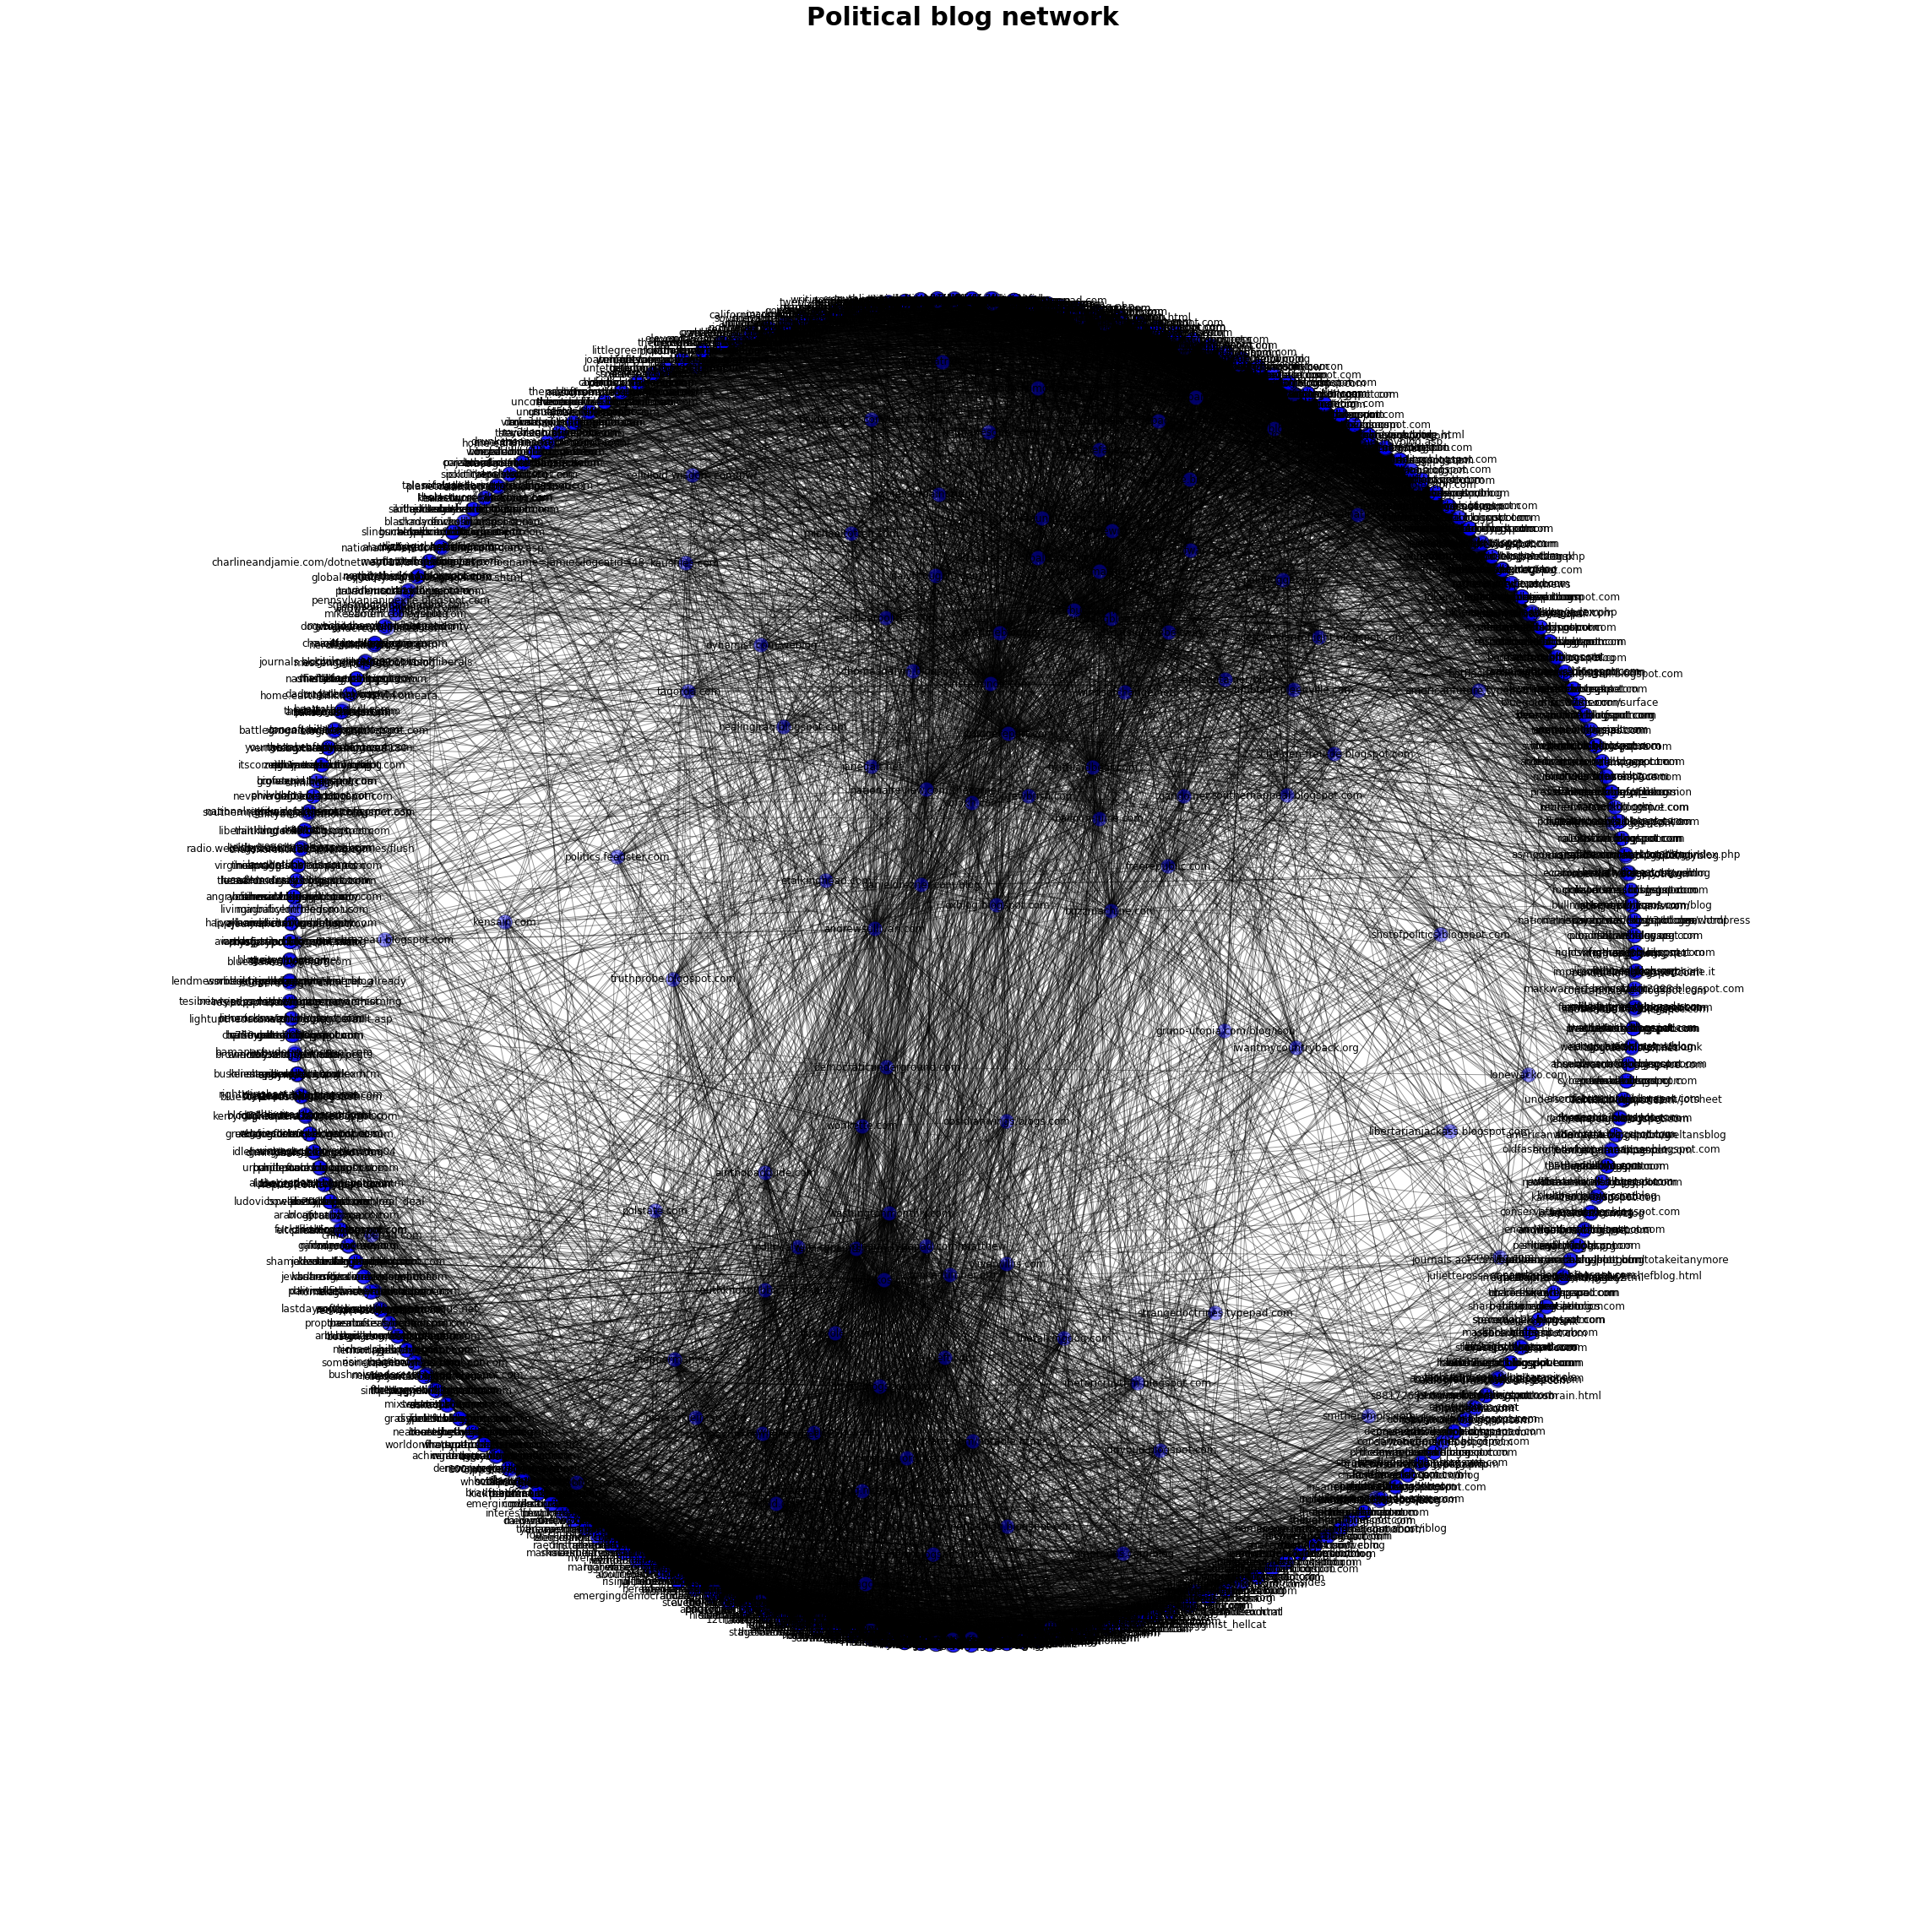

In [8]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

# The 10 most influential blogs


In [9]:
centrality= nx.eigenvector_centrality_numpy(G)

In [10]:
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [12]:
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "The 10 most influential blogs are:"
sorted_list_desc[0:10]

The 10 most influential blogs are:


[(u'atrios.blogspot.com', 0.19482295898856777),
 (u'dailykos.com', 0.16090716385818693),
 (u'washingtonmonthly.com', 0.14654050463836463),
 (u'digbysblog.blogspot.com', 0.14265582251978665),
 (u'bodyandsoul.typepad.com', 0.14114853531288904),
 (u'liberaloasis.com', 0.13953785666658594),
 (u'tbogg.blogspot.com', 0.1370485753554684),
 (u'corrente.blogspot.com', 0.12943073134224972),
 (u'talkingpointsmemo.com', 0.12700931078294156),
 (u'dneiwert.blogspot.com', 0.1223870390063801)]

# The 10 least influential blogs are

In [13]:
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "The 10 least influential blogs are:"
sorted_list_asc[0:10]

The 10 least influential blogs are:


[(u'digital-democrat.blogspot.com', -1.1252532956998585e-18),
 (u'thelonedem.com', 1.265405580718932e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.489792407970422e-09),
 (u'quimundus.modblog.com', 6.675725344779895e-08),
 (u'batr.org/commentary.html', 6.794245454793723e-07),
 (u'batr.net', 6.795053204390049e-07),
 (u'democratvoice.org', 1.0221602317223126e-06),
 (u'quimundus.squarespace.com', 6.056497487441798e-06),
 (u'massachusetts-liberal.com', 9.484711746613257e-06),
 (u'thingsasitis.net', 1.1737028626600667e-05)]

# Left wing and right wing blogs

In [14]:
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

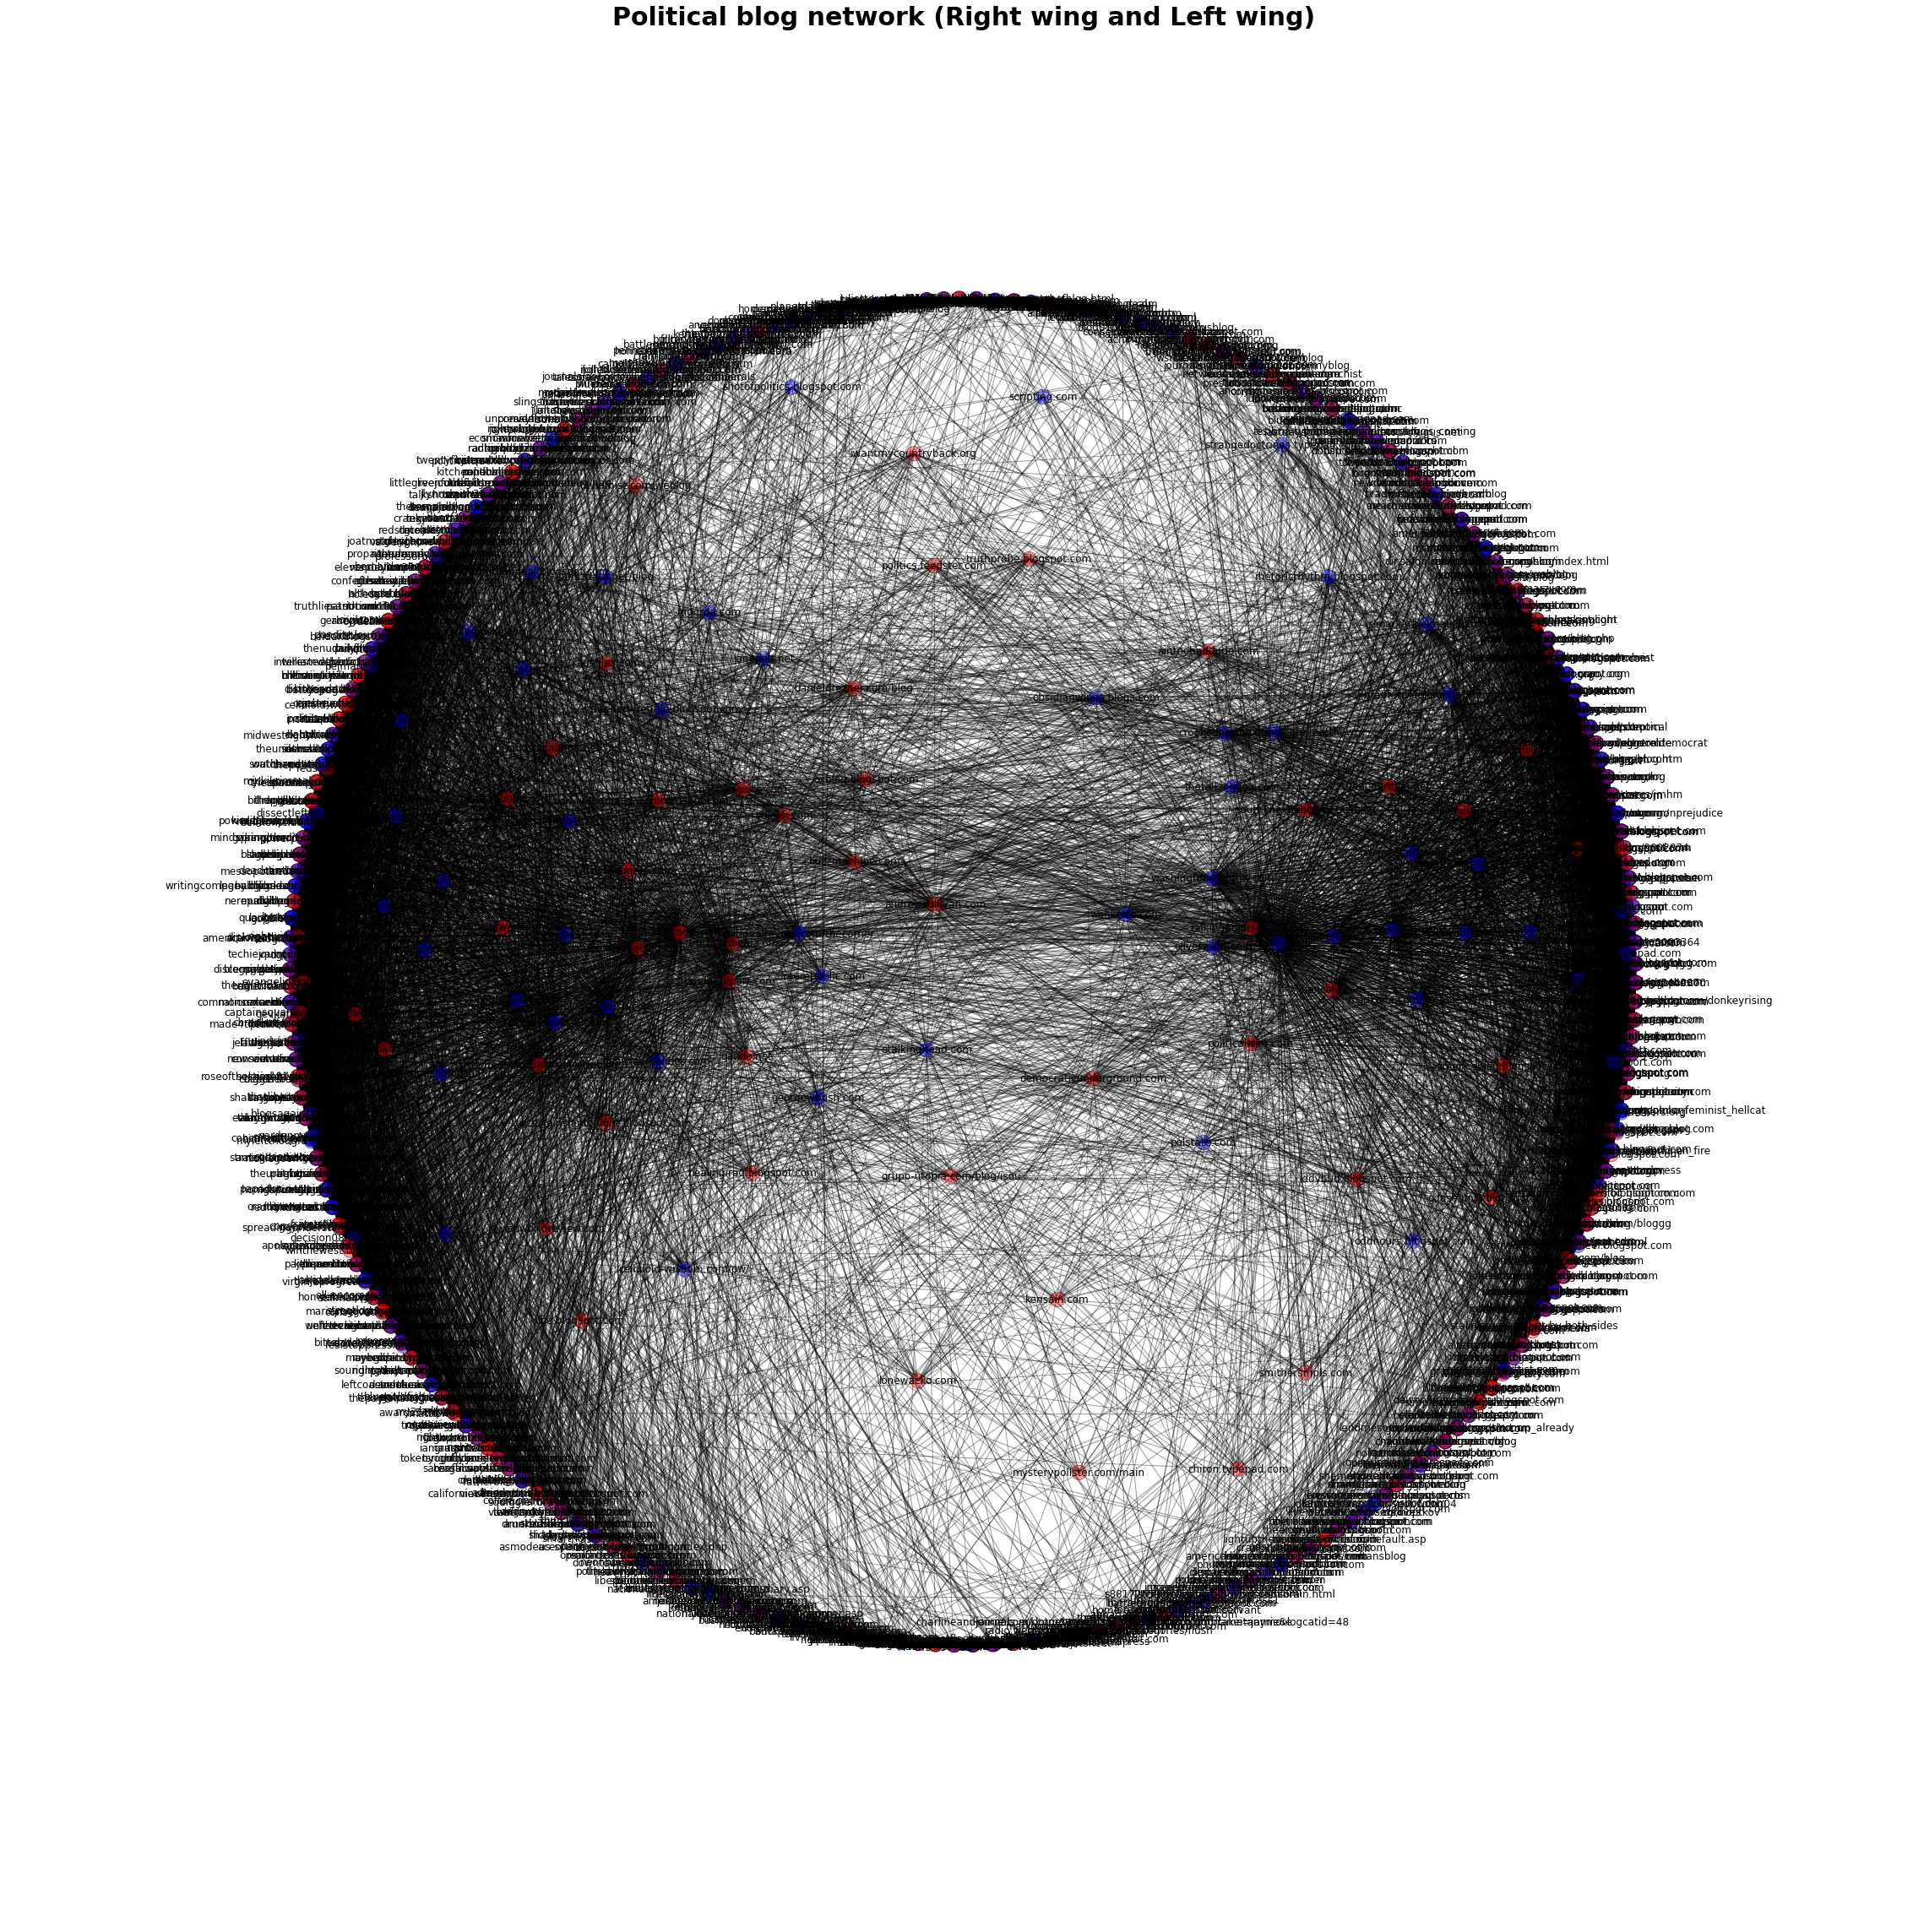

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()


In [16]:
# create weighted Left wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [17]:
# create weighted Right wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [18]:
#calculate the centrality of  of Left wing and right wing nodes separately. That gives importance of the node in each graph.
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [19]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [20]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The 10 most influential Left wing blogs are:"
sorted_list_desc_L[0:10]

The 10 most influential Left wing blogs are:


[(u'atrios.blogspot.com', 0.20959935892096684),
 (u'dailykos.com', 0.1683673952594422),
 (u'bodyandsoul.typepad.com', 0.15679475538395354),
 (u'liberaloasis.com', 0.15611618964885138),
 (u'digbysblog.blogspot.com', 0.15543644564126863),
 (u'tbogg.blogspot.com', 0.15010406230329548),
 (u'corrente.blogspot.com', 0.1448594779678341),
 (u'washingtonmonthly.com', 0.13968072023195283),
 (u'dneiwert.blogspot.com', 0.1347494894326667),
 (u'pandagon.net', 0.13295183425131976)]

In [21]:
print "The 10 least influential Left wing blogs are:"
sorted_list_asc_L[0:10]

The 10 least influential Left wing blogs are:


[(u'politicalinsanity.com', -8.44412032567247e-18),
 (u'votervirginblog.blogspot.com', -8.310339059689243e-18),
 (u'leavethematrix.blogspot.com', -7.865781584842048e-18),
 (u'atomicairship.com', -7.614913348265011e-18),
 (u'jpandre.blogspot.com', -7.605596858017565e-18),
 (u'decksitters.my-expressions.com', -7.552769756401963e-18),
 (u'xanga.com/home.aspx?user=phknrocket1k', -7.539122124933583e-18),
 (u'uwaythinks.blogspot.com', -7.455237067731661e-18),
 (u'steveguy.me.uk', -7.310786919390293e-18),
 (u'homepage.mac.com/jpbarr/myblog', -7.18844768425225e-18)]

In [22]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The 10 most influential Right wing blogs are:"
sorted_list_desc_R[0:10]

The 10 most influential Right wing blogs are:


[(u'instapundit.com', 0.21139229697591155),
 (u'blogsforbush.com', 0.20316205875962773),
 (u'hughhewitt.com', 0.17091871431714725),
 (u'lashawnbarber.com', 0.1588743831388078),
 (u'michellemalkin.com', 0.14740780092068134),
 (u'powerlineblog.com', 0.14624088810745062),
 (u'wizbangblog.com', 0.14567486363914597),
 (u'littlegreenfootballs.com/weblog', 0.13915353653390367),
 (u'vodkapundit.com', 0.13681349941635138),
 (u'outsidethebeltway.com', 0.12258395519745535)]

In [23]:
print "The 10 least influential Right wing blogs are:"
sorted_list_asc_R[0:10]

The 10 least influential Right wing blogs are:


[(u'jenjuskhan.blogspot.com', -8.657475875933346e-18),
 (u'gracefotography.com/graceblog/index.php', -8.614912741307984e-18),
 (u'poorandwhite.blogspot.com', -8.430786545803872e-18),
 (u'newsjungle.blogspot.com', -8.202553957983e-18),
 (u'gwbblows.blogspot.com', -7.727450813691095e-18),
 (u'markheimonen.blogspot.com', -7.495829729213234e-18),
 (u'prayforbush.blogspot.com', -7.373697556216601e-18),
 (u'mc256.blogspot.com', -7.198884451699349e-18),
 (u'rmcdaniel.blogspot.com', -7.153381136212139e-18),
 (u'myworldview034.blogspot.com', -7.012431817214395e-18)]